In [45]:
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import fastprop
import os
from rdkit import Chem
import seaborn as sns
from fastsolv_analysis.gradient_analysis import parity_plot, pdf_plot, cdf_plot, gradient_parity_plot, gradient_analysis

In [46]:
matplotlib.rcParams.update({'font.style': 'normal'})
matplotlib.rcParams.update({'font.sans-serif': 'Segoe UI'})
matplotlib.rcParams.update({'font.size': 26})

colors = sns.color_palette(palette='Accent').as_hex()

Set source directory

In [47]:
_src_dir: str = os.path.join(r"C:\Users\ChemeGrad2021\Documents\highsol\final_results")

In [48]:
fastprop_predictions: pd.DataFrame = pd.read_csv(os.path.join(_src_dir, "fastprop_5215_predictions/solprop_fastprop_nonaq_predictions.csv"))
fastprop_predictions[['solvent_smiles', 'solute_smiles']] = fastprop_predictions['smiles'].str.split('.', n=1, expand=True)
solute_smiles = fastprop_predictions.pop('solute_smiles')  
solvent_smiles = fastprop_predictions.pop('solvent_smiles')  

both = fastprop_predictions.pop('smiles')  

fastprop_predictions.insert(0, 'solvent_smiles', solvent_smiles) 
fastprop_predictions.insert(0, 'solute_smiles', solute_smiles) 

In [49]:
grouped_predictions = fastprop_predictions.groupby(['solvent_smiles', 'solute_smiles'])

# Create a list of smaller dataframes
sub_dfs = [group for _, group in grouped_predictions]

Analysis of temperature gradients

The example solution below demonstrates a case where the model predicts the temperature gradients well, despite being a off on magnitude of solubility

In [50]:
sub_dfs[100]

,solute_smiles,solvent_smiles,logS_true,temperature,logS_pred,stdev
570,CC(C1=CC(=CC=C1)C(=O)C2=CC=CC=C2)C(=O)O,C1COCCO1,0.409773,273.15,-1.123495,0.204374
571,CC(C1=CC(=CC=C1)C(=O)C2=CC=CC=C2)C(=O)O,C1COCCO1,0.525527,288.15,-0.923270,0.166006
576,CC(C1=CC(=CC=C1)C(=O)C2=CC=CC=C2)C(=O)O,C1COCCO1,0.483910,283.15,-0.988443,0.177813
577,CC(C1=CC(=CC=C1)C(=O)C2=CC=CC=C2)C(=O)O,C1COCCO1,0.588374,293.15,-0.858800,0.155761
579,CC(C1=CC(=CC=C1)C(=O)C2=CC=CC=C2)C(=O)O,C1COCCO1,0.447964,278.15,-1.054524,0.190485
581,CC(C1=CC(=CC=C1)C(=O)C2=CC=CC=C2)C(=O)O,C1COCCO1,0.643832,303.15,-0.729239,0.136293
582,CC(C1=CC(=CC=C1)C(=O)C2=CC=CC=C2)C(=O)O,C1COCCO1,0.613395,298.15,-0.793575,0.145835


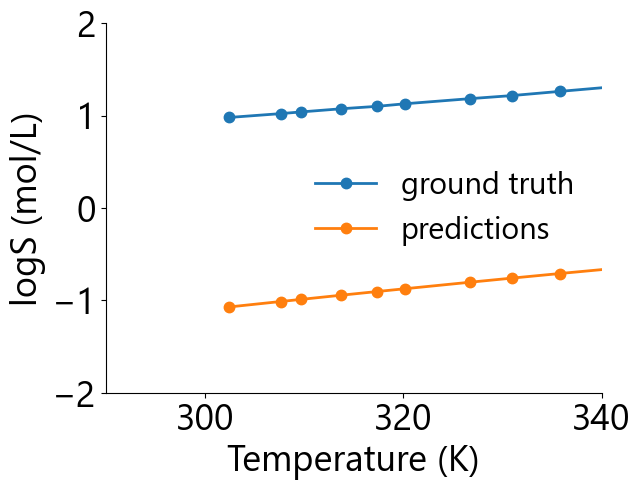

In [51]:
plt.figure(figsize=[6.4,4.8])
ax1 = plt.gca()
ax1.plot(sub_dfs[0]['temperature'],sub_dfs[0]['logS_true'], linestyle = '-', linewidth = 2, marker = '.', markersize = '15', label = r'ground truth')
ax1.plot(sub_dfs[0]['temperature'],sub_dfs[0]['logS_pred'], linestyle = '-', linewidth = 2, marker = '.', markersize = '15', label = r'predictions')

ax1.set_xlim([290, 340])
ax1.set_ylim([-2, 2])
ax1.set_ylabel("logS (mol/L)")
ax1.set_xlabel("Temperature (K)")
ax1.legend(prop={'size': 22}, frameon = False) 
ax1.spines[['right', 'top']].set_visible(False)

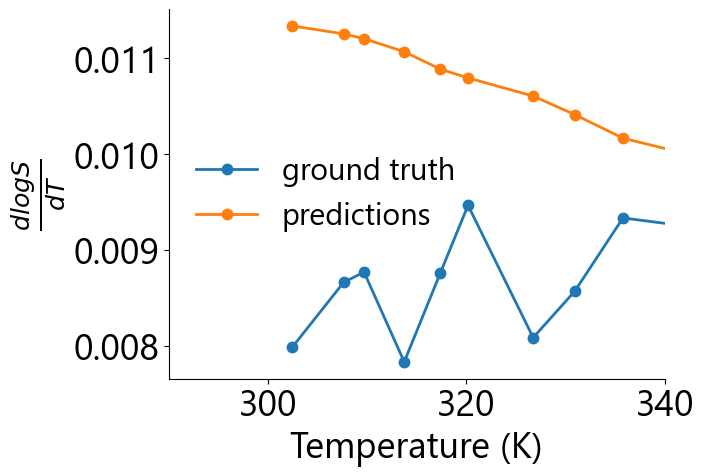

In [52]:
grads_true = np.gradient(sub_dfs[0]['logS_true'], sub_dfs[0]['temperature'])
grads_predicted = np.gradient(sub_dfs[0]['logS_pred'], sub_dfs[0]['temperature'])

plt.figure(figsize=[6.4,4.8])
ax1 = plt.gca()
ax1.plot(sub_dfs[0]['temperature'],grads_true, linestyle = '-', linewidth = 2, marker = '.', markersize = '15', label = r'ground truth')
ax1.plot(sub_dfs[0]['temperature'],grads_predicted, linestyle = '-', linewidth = 2, marker = '.', markersize = '15', label = r'predictions')

ax1.set_xlim([290, 340])
#ax1.set_ylim([-1.5, 0])
ax1.set_ylabel(r"$\frac{dlogS}{dT}$")
ax1.set_xlabel("Temperature (K)")
ax1.legend(prop={'size': 22}, frameon = False) 
ax1.spines[['right', 'top']].set_visible(False)

But here, the slope is a bit off, even though magnitudes are reasonable. 

In [53]:
sub_dfs[151]

,solute_smiles,solvent_smiles,logS_true,temperature,logS_pred,stdev
3519,CCCCC1C(=O)N(N(C1=O)C2=CC=CC=C2)C3=CC=CC=C3,CC#N,-0.171652,283.12,-0.219952,0.239547
3524,CCCCC1C(=O)N(N(C1=O)C2=CC=CC=C2)C3=CC=CC=C3,CC#N,-0.035505,288.15,-0.134844,0.223862
3528,CCCCC1C(=O)N(N(C1=O)C2=CC=CC=C2)C3=CC=CC=C3,CC#N,0.110085,293.15,-0.051896,0.211739
3533,CCCCC1C(=O)N(N(C1=O)C2=CC=CC=C2)C3=CC=CC=C3,CC#N,0.275007,298.17,0.030644,0.202705
3537,CCCCC1C(=O)N(N(C1=O)C2=CC=CC=C2)C3=CC=CC=C3,CC#N,0.375269,303.15,0.111036,0.197053
3543,CCCCC1C(=O)N(N(C1=O)C2=CC=CC=C2)C3=CC=CC=C3,CC#N,0.470264,308.13,0.190342,0.193590
3547,CCCCC1C(=O)N(N(C1=O)C2=CC=CC=C2)C3=CC=CC=C3,CC#N,0.561481,313.10,0.267447,0.191858
3552,CCCCC1C(=O)N(N(C1=O)C2=CC=CC=C2)C3=CC=CC=C3,CC#N,0.647513,318.17,0.344869,0.192859
3557,CCCCC1C(=O)N(N(C1=O)C2=CC=CC=C2)C3=CC=CC=C3,CC#N,0.726064,323.16,0.419719,0.195652


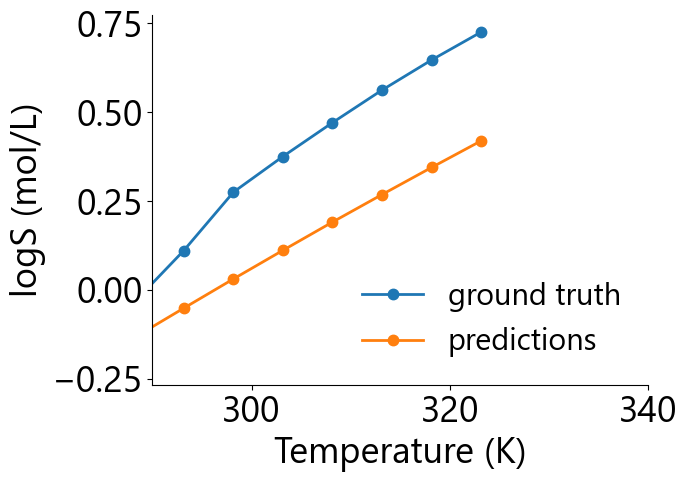

In [54]:
plt.figure(figsize=[6.4,4.8])
ax1 = plt.gca()
ax1.plot(sub_dfs[151]['temperature'],sub_dfs[151]['logS_true'], linestyle = '-', linewidth = 2, marker = '.', markersize = '15', label = r'ground truth')
ax1.plot(sub_dfs[151]['temperature'],sub_dfs[151]['logS_pred'], linestyle = '-', linewidth = 2, marker = '.', markersize = '15', label = r'predictions')

ax1.set_xlim([290, 340])
#ax1.set_ylim([-1.5, 0])
ax1.set_ylabel("logS (mol/L)")
ax1.set_xlabel("Temperature (K)")
ax1.legend(prop={'size': 22}, frameon = False) 
ax1.spines[['right', 'top']].set_visible(False)

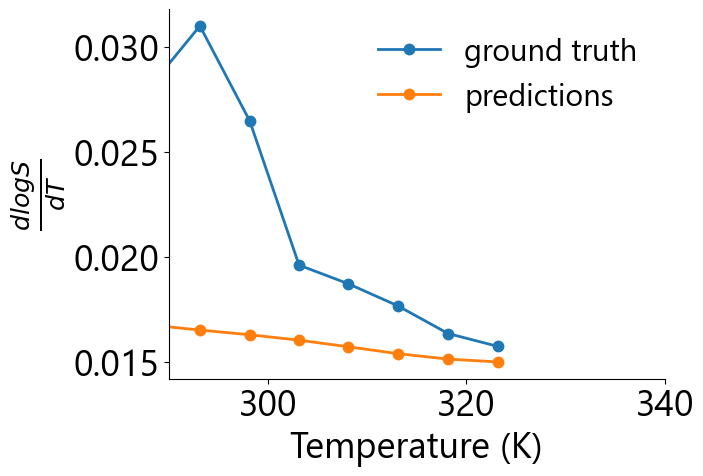

In [55]:
grads_true = np.gradient(sub_dfs[151]['logS_true'], sub_dfs[151]['temperature'])
grads_predicted = np.gradient(sub_dfs[151]['logS_pred'], sub_dfs[151]['temperature'])

plt.figure(figsize=[6.4,4.8])
ax1 = plt.gca()
ax1.plot(sub_dfs[151]['temperature'],grads_true, linestyle = '-', linewidth = 2, marker = '.', markersize = '15', label = r'ground truth')
ax1.plot(sub_dfs[151]['temperature'],grads_predicted, linestyle = '-', linewidth = 2, marker = '.', markersize = '15', label = r'predictions')

ax1.set_xlim([290, 340])
#ax1.set_ylim([-1.5, 0])
ax1.set_ylabel(r"$\frac{dlogS}{dT}$")
ax1.set_xlabel("Temperature (K)")
ax1.legend(prop={'size': 22}, frameon = False) 
ax1.spines[['right', 'top']].set_visible(False)

Now, we look quantitatively at how the errors in the gradients are distributed across the datasets

c:\ProgramData\Miniconda3\envs\PythonDeepChemENV2\lib\site-packages\numpy\lib\function_base.py:1239: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\ProgramData\Miniconda3\envs\PythonDeepChemENV2\lib\site-packages\numpy\lib\function_base.py:1240: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\ProgramData\Miniconda3\envs\PythonDeepChemENV2\lib\site-packages\numpy\lib\function_base.py:1241: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\ProgramData\Miniconda3\envs\PythonDeepChemENV2\lib\site-packages\numpy\lib\function_base.py:1247: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]
c:\ProgramData\Miniconda3\envs\PythonDeepChemENV2\lib\site-packages\numpy\lib\function_base.py:1256: RuntimeWarning: divide by zero encountered in double_scalars
  out[tuple(slice1)] = (f[tuple(slice2)

<Figure size 640x480 with 0 Axes>

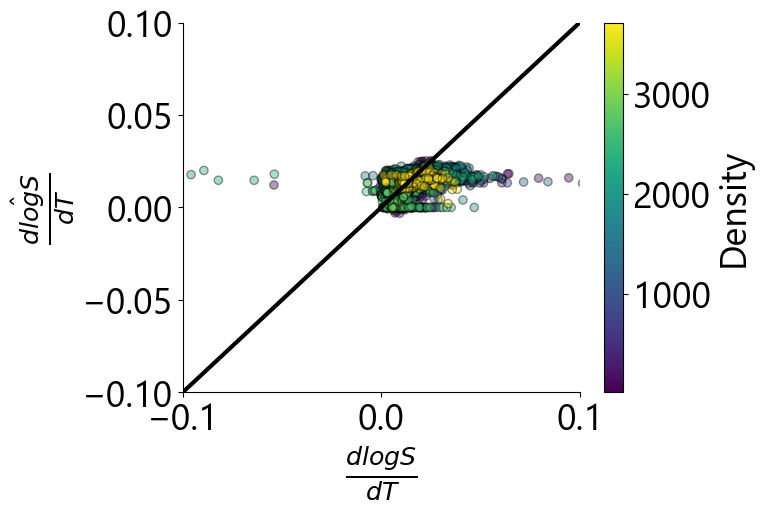

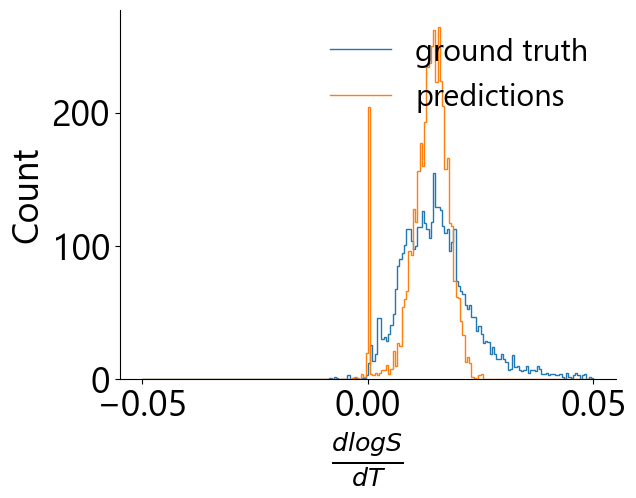

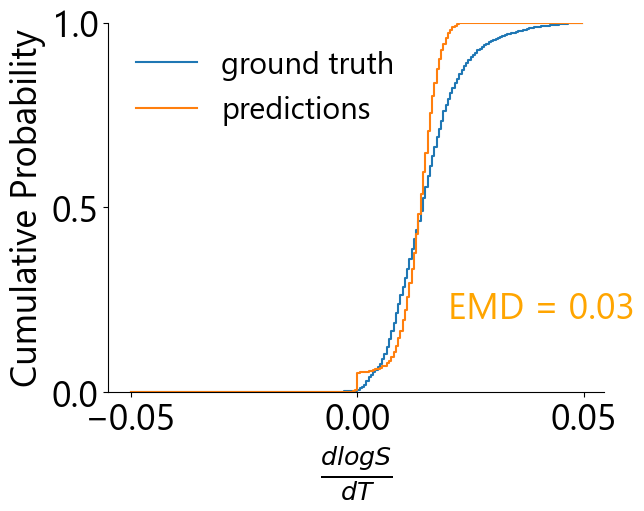

In [56]:
true_grads, pred_grads, mse, mae = gradient_analysis(fastprop_predictions)
gradient_parity_plot(true_grads, pred_grads)
ax1, true_grads_binned, pred_grads_binned, true_grad_bins_pdf, pred_grad_bins_pdf = pdf_plot(true_grads, pred_grads, bins =200)
ax2, true_grads_cdf, pred_grads_cdf, distance, true_grad_bins_cdf, pred_grad_bins_cdf = cdf_plot(true_grads, pred_grads, bins = 200)